<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center">Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Multiclass Clasification</h2>
<div>

### Imports

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons, make_blobs

### Plotting function

In [6]:
def plot_points(x,y):    
    plt.scatter(x[y==0, 0], x[y==0, 1], c="skyblue")
    plt.scatter(x[y==1, 0], x[y==1, 1], c="forestgreen")
    plt.scatter(x[y==2, 0], x[y==2, 1], c="coral")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis("equal")
    #plt.legend()
    plt.show()

### Syntatic data

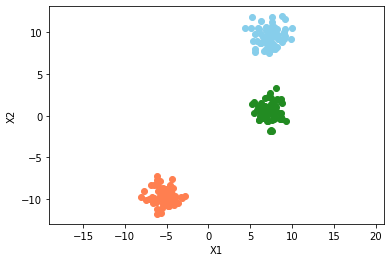

In [7]:
x, y = make_blobs(n_samples=200, random_state=8)
plot_points(x,y)

### TF

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Model
- Try `"relu"` and `"swish"`

In [10]:
inputs = keras.Input(shape=(2,), name="INPUT")
layer1 = layers.Dense(3, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_1')(inputs)
layer2 = layers.Dense(2, activation='swish', kernel_initializer="he_uniform", bias_initializer="zeros", name='HIDDEN_2')(layer1)
layer3 = layers.Dense(3, activation='sigmoid', kernel_initializer="he_uniform", bias_initializer="zeros", name='OUTPUT')(layer2)

model = keras.Model(inputs=inputs, outputs=layer3)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 3)                 9         
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 2)                 8         
_________________________________________________________________
OUTPUT (Dense)               (None, 3)                 9         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
all_w1 = []
all_w2 = []

def save_weights_per_epoch(batch, logs):
    global all_w1
    global all_w2
    
    w1, b1 = model.layers[1].get_weights()
    w2, b2 = model.layers[2].get_weights()
    
    all_w1.append(w1)
    all_w2.append(w2)

In [13]:
model.compile(loss      = 'sparse_categorical_crossentropy',
              optimizer = keras.optimizers.SGD(learning_rate=0.1),
              metrics   = ['accuracy'])

train_hist = model.fit(x, y, epochs=10, batch_size=32, callbacks=[keras.callbacks.LambdaCallback(on_epoch_begin=save_weights_per_epoch)])

pred = model.predict(x)

#plot_3d(x, y_true, model(x))

Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 5/10
7/7 [==============================] - 0s 971us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 8/10
7/7 [==============================] - 0s 970us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 1.0000


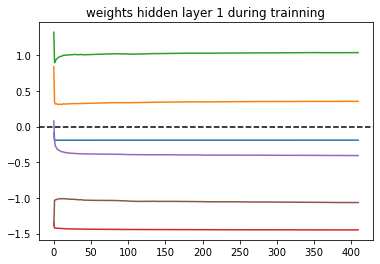

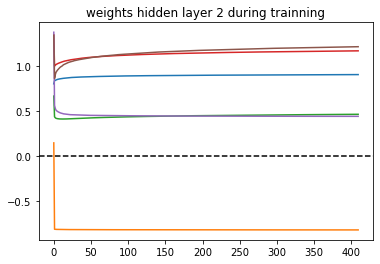

In [14]:
all_w1_np = np.array(all_w1)
all_w2_np = np.array(all_w2)

for i in range(all_w1_np.shape[1]):
    for j in range(all_w1_np.shape[2]):
        plt.plot(all_w1_np[:,i,j])
plt.axhline(0,  color='black', linestyle='dashed')
plt.title("weights hidden layer 1 during trainning")
plt.show()

for i in range(all_w2_np.shape[1]):
    for j in range(all_w2_np.shape[2]):
        plt.plot(all_w2_np[:,i,j])
plt.axhline(0,  color='black', linestyle='dashed')
plt.title("weights hidden layer 2 during trainning")
plt.show()

In [15]:
def plot_surface(minimum, maximun, resolution):

    x1_indexes = np.linspace(minimum, maximun, resolution)
    x2_indexes = np.linspace(minimum, maximun, resolution)

    x1, x2 = np.meshgrid(x1_indexes, x2_indexes)

    x = np.hstack(( x1.reshape(resolution*resolution,-1), x2.reshape(resolution*resolution,-1) ))

    y = model.predict(x).reshape(resolution, resolution)

    plt.pcolormesh(x1, x2, y, cmap="coolwarm")
    plt.colorbar()
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis("equal")
    #plt.show()
    
plot_surface(minimum=-2, maximun=2, resolution=100)
plot_points(x,y)

ValueError: cannot reshape array of size 30000 into shape (100,100)

<ipython-input-9-43166a6e1a56>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, y, cmap="coolwarm")


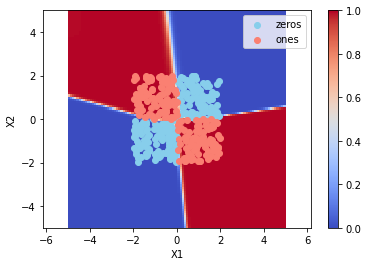

In [10]:
plot_surface(minimum=-5, maximun=5, resolution=100)
plot_points(x,y)

<ipython-input-9-43166a6e1a56>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, y, cmap="coolwarm")


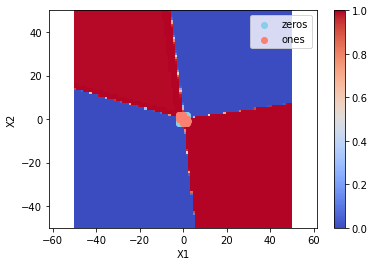

In [11]:
plot_surface(minimum=-50, maximun=50, resolution=100)
plot_points(x,y)